In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
!head "D:/Programming/ML/Prodigy_Infotech/Task_5/food-101/food-101/meta/train.txt"

'head' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
train_data = pd.read_csv("D:/Programming/ML/Prodigy_Infotech/Task_5/food-101/food-101/meta/train.txt", header=None, names=['image_path'])
test_data = pd.read_csv("D:/Programming/ML/Prodigy_Infotech/Task_5/food-101/food-101/meta/test.txt", header=None, names=['image_path'])
print(f"Number of training samples: {len(train_data)}")

Number of training samples: 75750


In [4]:
def extract_class(path, return_type='id'):
    return path.split('/')[0] if return_type.lower() == 'class' else path.split('/')[-1]

In [5]:
train_data['class'] = train_data['image_path'].map(lambda x: extract_class(x, 'class'))
train_data['id'] = train_data['image_path'].map(lambda x: extract_class(x))
test_data['class'] = test_data['image_path'].map(lambda x: extract_class(x, 'class'))
test_data['id'] = test_data['image_path'].map(lambda x: extract_class(x))

In [6]:
selected_classes = train_data['class'].unique()[:20]
print("Selected classes:", selected_classes)

Selected classes: ['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheesecake' 'cheese_plate' 'chicken_curry'
 'chicken_quesadilla']


In [7]:
selected_classes = [cls.upper() for cls in selected_classes]

In [8]:
def filter_classes(label):
    return label if label.upper() in selected_classes else 'others'

In [9]:
train_data['class'] = train_data['class'].map(lambda x: filter_classes(x))
test_data['class'] = test_data['class'].map(lambda x: filter_classes(x))
print("Filtered classes:", train_data['class'].unique())

Filtered classes: ['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheesecake' 'cheese_plate' 'chicken_curry'
 'chicken_quesadilla' 'others']


In [10]:
def add_image_path(path):
    return 'D:/Programming/ML/Prodigy_Infotech/Task_5/food-101/food-101/images/' + path + '.jpg'

In [11]:
train_data['image_path'] = train_data['image_path'].apply(add_image_path)
test_data['image_path'] = test_data['image_path'].apply(add_image_path)

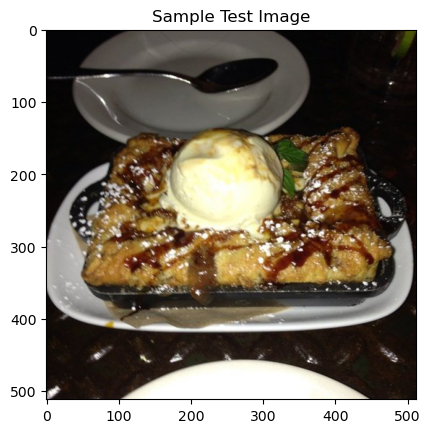

Test image shape: (512, 512, 3)


In [12]:
sample_image = plt.imread(test_data['image_path'].iloc[114])
plt.imshow(sample_image)
plt.title('Sample Test Image')
plt.show()
print("Test image shape:", sample_image.shape)

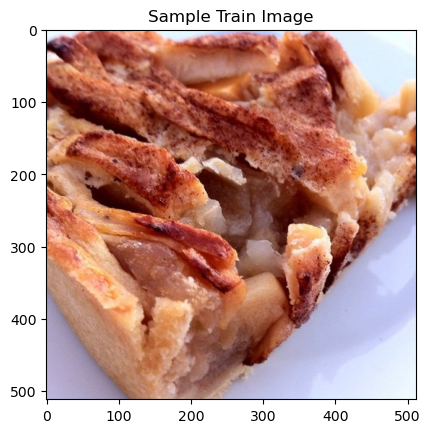

Train image shape: (512, 512, 3)


In [13]:
sample_train_image = plt.imread(train_data['image_path'].iloc[13])
plt.imshow(sample_train_image)
plt.title('Sample Train Image')
plt.show()
print("Train image shape:", sample_train_image.shape)

In [14]:
data_generator = ImageDataGenerator(rescale=1. / 255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
TARGET_SIZE = (128, 128) 
BATCH_SIZE = 16

In [15]:
test_generator = data_generator.flow_from_dataframe(dataframe=test_data,
                                                    x_col='image_path',
                                                    y_col='class',
                                                    target_size=(256, 256),
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    shuffle=False)

Found 25250 validated image filenames belonging to 21 classes.


In [16]:
train_generator = data_generator.flow_from_dataframe(dataframe=train_data,
                                                     x_col='image_path',
                                                     y_col='class',
                                                     target_size=(256, 256),
                                                     color_mode='rgb',
                                                     class_mode='categorical',
                                                     batch_size=32,
                                                     shuffle=True)

Found 75750 validated image filenames belonging to 21 classes.


In [17]:
steps_per_epoch = len(train_generator) // BATCH_SIZE

In [18]:
base_model = Xception(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(21, activation='softmax')(x)

In [19]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator) // 32,
                    epochs=63,
                    verbose=1)

Epoch 1/63


D:\anaconda_downloader\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 751s 9s/step - accuracy: 0.6955 - loss: 1.7641
Epoch 2/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 704s 9s/step - accuracy: 0.8125 - loss: 1.0543
Epoch 3/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 663s 9s/step - accuracy: 0.8082 - loss: 0.9745
Epoch 4/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 654s 9s/step - accuracy: 0.7890 - loss: 0.9974
Epoch 5/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 706s 10s/step - accuracy: 0.7957 - loss: 0.8934
Epoch 6/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 656s 9s/step - accuracy: 0.8130 - loss: 0.7498
Epoch 7/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 656s 9s/step - accuracy: 0.8257 - loss: 0.6727
Epoch 8/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 654s 9s/step - accuracy: 0.8264 - loss: 0.6821
Epoch 9/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 662s 9s/step - accuracy: 0.8445 - loss: 0.6367
Epoch 10/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 755s 10s/step - accuracy: 0.8380 - loss: 0.6257
Epoch 11/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 762s 10s/step - accuracy: 0.8535 - loss: 0.5390
Epoch 12/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 755s 10s/step - accuracy: 0.8616

D:\anaconda_downloader\Anaconda\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


74/74 ━━━━━━━━━━━━━━━━━━━━ 645s 9s/step - accuracy: 0.8849 - loss: 0.4219
Epoch 35/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 635s 9s/step - accuracy: 0.9114 - loss: 0.3463
Epoch 36/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 646s 9s/step - accuracy: 0.8993 - loss: 0.3754
Epoch 37/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 643s 9s/step - accuracy: 0.9168 - loss: 0.2901
Epoch 38/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 643s 9s/step - accuracy: 0.8998 - loss: 0.3492
Epoch 39/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 650s 9s/step - accuracy: 0.8940 - loss: 0.3512
Epoch 40/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 734s 10s/step - accuracy: 0.9004 - loss: 0.3499
Epoch 41/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 783s 11s/step - accuracy: 0.9163 - loss: 0.3311
Epoch 42/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 782s 11s/step - accuracy: 0.9210 - loss: 0.3005
Epoch 43/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 781s 11s/step - accuracy: 0.9225 - loss: 0.3061
Epoch 44/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 780s 11s/step - accuracy: 0.9130 - loss: 0.3093
Epoch 45/63
74/74 ━━━━━━━━━━━━━━━━━━━━ 654s 9s/step - accurac

In [21]:
evaluation_results = model.evaluate(test_generator, batch_size=32)
print("Evaluation results:", evaluation_results)

790/790 ━━━━━━━━━━━━━━━━━━━━ 2140s 3s/step - accuracy: 0.7928 - loss: 0.7524
Evaluation results: [0.34855470061302185, 0.9050692915916443]


In [22]:
model.save('food_dip.hdf5')